<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming And Numerical Methods: A Guide For Engineers And Scientists](); the content is available [on GitHub]().*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book]()!*

<!--NAVIGATION-->
< [16.4 Least Squares Regression in Python](chapter16.04-Least-Squares-Regression-in-Python.ipynb)   | [Contents](Index.ipynb) | [16.6 Summary and Problems](chapter16.06-Summary-and-Problems.ipynb)    >

# Least Square Regression for Nonlinear Functions

Least squares regression requires that the estimation function be a linear combination of basis functions. However, there are some functions that cannot be put in this form but where a least squares regression is still appropriate. 

Here we will introduce two ways to deal with the non-linear functions. 

* We can accomplish this by taking advantage of the properties of logarithms, and transform the non-linear function into a linear function
* We can use the *curve_fit* function from scipy to direct estimate the parameters for the non-linear function using least square.

### Log tricks
Assume you have a function of the form $\hat{y}(x) = {\alpha} e^{{\beta} x}$ and data for $x$ and $y$, and that you want to do least squares regression to find ${\alpha}$ and ${\beta}$. Clearly, the previous set of basis functions (linear) would be an inappropriate choice to describe $\hat{y}(x)$. However, if we take the $\log$ of both sides, we get $\log(\hat{y}(x)) = \log({\alpha}) + {\beta} x$. Now if we say that $\tilde{y}(x) = \log(\hat{y}(x))$ and $\tilde{{\alpha}} = \log({\alpha})$, then we get $\tilde{y}(x) = \tilde{{\alpha}} + {\beta} x$. We can perform least squares regression on the linearized expression to find $\tilde{y}(x), \tilde{{\alpha}}$, and ${\beta}$, and then recover ${{\alpha}}$ by using the expression ${\alpha} = e^{\tilde{{\alpha}}}$.

Let's generate some data for this example using $\alpha = 0.1$ and $\beta = 0.3$. 

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [2]:
# let's generate x and y, and add some noise into y
x = np.linspace(0, 10, 101)
y = 0.1*np.exp(0.3*x) + 0.1*np.random.random(len(x))

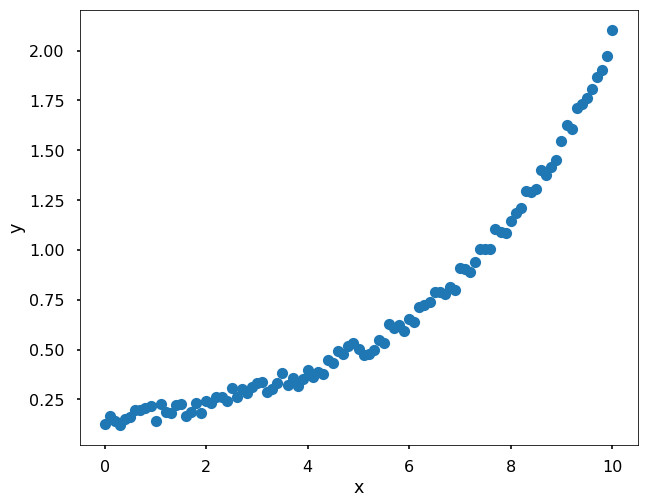

In [3]:
# Let's have a look of the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
A = np.vstack([x, np.ones(len(x))]).T
beta, log_alpha = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
alpha = np.exp(log_alpha)
print(f'alpha={alpha}, beta={beta}')

alpha=0.1368111369970443, beta=0.2653415908836007


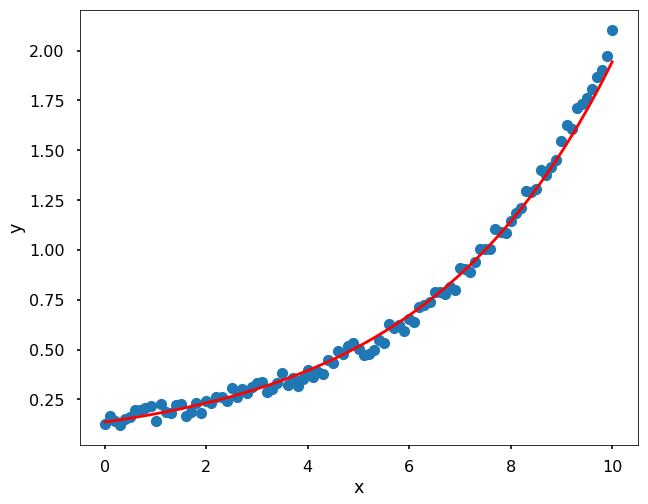

In [5]:
# Let's have a look of the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'o')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Use optimize.curve_fit from scipy

We can use the *curve_fit* function to fit any form function and estimate the parameters of it. Here is how we solve the above problem using the *curve_fit* function. 

In [6]:
# let's define the function form
def func(x, a, b):
    y = a*np.exp(b*x)
    return y

alpha, beta = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(f'alpha={alpha}, beta={beta}')

alpha=0.1253601833294894, beta=0.2782330179897619


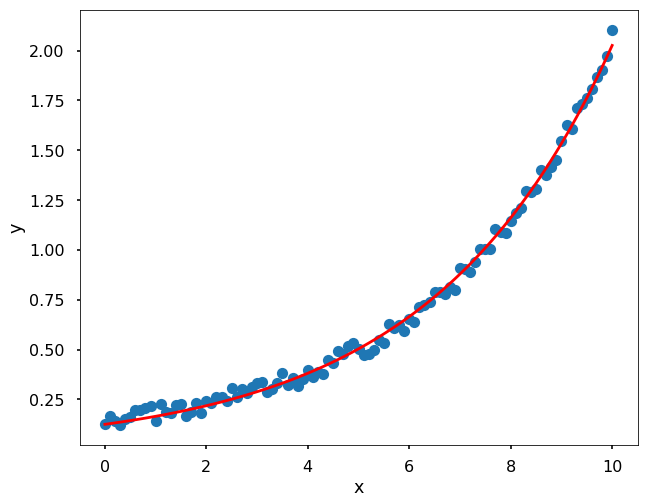

In [7]:
# Let's have a look of the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'o')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<!--NAVIGATION-->
< [16.4 Least Squares Regression in Python](chapter16.04-Least-Squares-Regression-in-Python.ipynb)   | [Contents](Index.ipynb) | [16.6 Summary and Problems](chapter16.06-Summary-and-Problems.ipynb)    >